
## напишіть функцію гіпотези лінійної регресії у векторному вигляді
INTRO - я буду ленив, простите, и не стану вырисовывать красивые математические формулы и вставлять как картинки. 

Классически - гипотеза линейной функции(регрессии) есть ничто иное как скалярное произведение двух векторов

  h(x)=w0 + w1*x1 + w2*x2 + ...wi*xi+... + wn*xn

  где - w (по порядку) - есть весовые коэффициенты каждой фичи, которая именуется у нас как xi

  формула h(x) легко переписывается в векторном виде как

  h(x) = W*X, где W - вектор весовых коэффициентов, а Х - вектор заданных значений фич.

  на языке Python


  W = np.array([w])

  X = np.array([x])

  H = np.dot(W,X)

---


​
​


In [1]:
import numpy as np
def H(w:list,x:list):
  W = np.array(w)
  x.insert(0,1)  # обязательно вставить для нулевого весового коэффициента ссответвующую 1
  X = np.array(x)
  h = np.dot(w,x)
  return h

## створіть функцію для обчислення функції втрат у векторному вигляді

J(w0,w1​)= 1/2m i=1∑m ​ (h(x(i))−y(i))**2

Это классическая функция потерь для одной переменной (фичи)
в случае нескольких переменных у нас ничего не поменятся особо, поскольку значение функции потерь в какой-то конкретной точке (наборе входных данных) -  это всегда простое скалярное число (не вектор не матрица) а просто число - показывающее отклонение от гипотезы при известном значении функции. Вся разница в том, что значение линейной регрессии теперь будет принимать много фич (вектор входных значений и вектор коэфициентов) 

In [ ]:
# потеря в конкретной точке - отклонение
def Loss(w, x, y):  # список коєфф, таблица с входными наборами данных, список известных результатов
  W = np.array(w)
  X = np.array(x)
  Y = np.array(y)
  # находим матрицу отклонений
  l = X*W - Y #матричное умножение (не скалярное!!!) получаем в каждой ячейке значение гипотезы, далее в каждой ячейке вычитаем результат
              # получаем вектор отклонений размерностью (m, 1)
  l.T # переводим в матрицу (1, m)
  l.power(2)  # возводим в квадрат каждое значение в матрице ( матрица квадратов отклонений)
  m = l.shape[0] # получаем размерность матрицы с квадратами отклонений
  L = (1/2*m)*l.sum()
  return L


## реалізуйте один крок градієнтного спуску

Формула нам известна 
w= w_prev − α/m*X_T(X*w - Y)

где Х - матрица с входными данными

w  - вектор весовых коэффициентов

Y - вектор результата

In [ ]:
w_prew = 0   # предыдущее значение шага спуска
a = 0.0001   # коєффициент спуска (в некотором смісле скорость спуска)
def Grad_Dec(x, w, y):
  X = np.array(x)   # матрица
  y_v = np.array(y) # вектор
  w_v = np.array(w) # вектор
  X_T = X.T     # взяли транспонированую матрицу
  m = len(y)    # количество примеров
  w = w_prew - (a/m)*(np.dot(X_T, (X*w_v - y_v)))
  w_prew = w   # можно біло не писать єту строку, но я для того чтобі показать что понимаю алгоритм - это значение будет сохраняться и применяться
               # в той процедуре в которой будет цикл while, в котором и будет вычисляться градиент пока не станет меньше заданной точности
  return w


Все приведенные выше листинги кода - понятно что не отлажены...но я их писал для того чтобы показать что понимаю алгоритм

## Проведем анализ датасета

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/gdrive')
path = '/content/gdrive/MyDrive/Python/Data_Science_8/Housing.csv'
my_df = pd.read_csv(path)
my_df = my_df[['price', 'area', 'bedrooms', 'bathrooms']]
print(my_df.head(4))  # контроль что получили то, что хотели
print(pd.isna(my_df).sum())   # контроль что датасет без аномальных значений

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
      price  area  bedrooms  bathrooms
0  13300000  7420         4          2
1  12250000  8960         4          4
2  12250000  9960         3          2
3  12215000  7500         4          2
price        0
area         0
bedrooms     0
bathrooms    0
dtype: int64


In [8]:
my_df.shape

(545, 4)

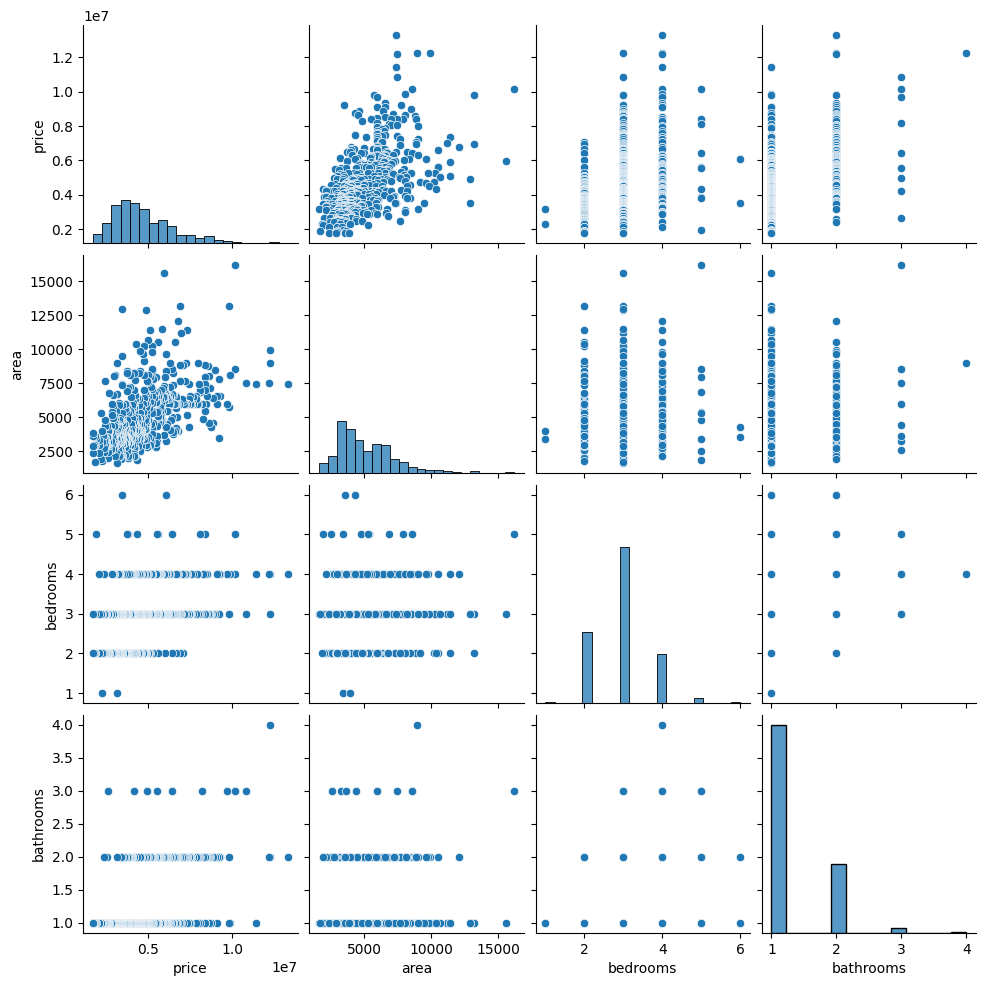

In [11]:
sns.pairplot(my_df,
             vars = ['price', 'area', 'bedrooms', 'bathrooms'])

In [12]:
y_vec = np.array(my_df['price'])   # y как вектор
#print(y_vec)

l_1 = []
for i in range(545):
  l_1.append(1)
df_1 = pd.DataFrame({'x_0':l_1})  # формируем массив 1
df_x = pd.concat([df_1, my_df[['area', 'bedrooms', 'bathrooms']]], axis=1)  # сформирована матрица Х с первым столобцом из 1

X = np.array(df_x)
#print(X)

Начинаем вычисление псевдообернутой матрицы. При этом помним что для матриц важен порядок умножений, от перестановки местами результат МЕНЯЕТСЯ

In [13]:
X_T = X.transpose()       # транспонирования матрица
X_P = np.dot(X_T,X)       # первое произведение
X_inv = np.linalg.inv(X_P)  # обратная матрица к этому произведению
X_prom = np.dot(X_T, y_vec) # второе произведение
W_res = np.dot(X_inv, X_prom)  # третье произведение - получаем наш вектор коэффициентов
print(W_res)

[-1.73171608e+05  3.78762754e+02  4.06820034e+05  1.38604950e+06]


## Попробуем чрерз skikit-learn

In [20]:
from sklearn.linear_model import LinearRegression

X = np.array(my_df[['area', 'bedrooms', 'bathrooms']])   # столбец с 1 подставляется автоматически,....наверное

y = np.array(my_df['price'])   # y как вектор

reg = LinearRegression().fit(X, y)

In [21]:
reg.score(X, y)

0.4870830667058762

In [22]:
reg.coef_

array([3.78762754e+02, 4.06820034e+05, 1.38604950e+06])

In [23]:
reg.intercept_

-173171.6076326361

Коэффициенты совпадают абсолютно. Похоже внутри skikit-learn используется тот самый алгоритм из линейной алгебры, который мы применили чуть выше - с псевдооберненой матрицей

Рисовать графики 2D с зависимостью цены от каждой переменной мне думается малоинформативным....а изображать зависимость от 3 переменных я могу представить, но не изобразить)))